In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
path_to_dataset = '/Users/sachinta/GitProjects/AMATH-482/Homework Assignments/Homework 4/house-votes-84.data'

data = np.genfromtxt(path_to_dataset, delimiter=',', dtype=object, unpack=True)

print(data)

[[b'republican' b'republican' b'democrat' ... b'republican' b'republican'
  b'republican']
 [b'n' b'n' b'?' ... b'n' b'n' b'n']
 [b'y' b'y' b'y' ... b'?' b'n' b'y']
 ...
 [b'y' b'y' b'y' ... b'y' b'y' b'y']
 [b'n' b'n' b'n' ... b'n' b'n' b'?']
 [b'y' b'?' b'n' ... b'y' b'y' b'n']]


In [31]:
Y = data[0]
Y = np.asarray([1 if i == b'democrat' else -1 for i in Y])
print(Y)

[-1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1
  1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1
 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1
  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1
  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1
  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1
  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1
 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1

In [32]:
X = data[1:]
for index, column in enumerate(X): 
    new_column = []
    for i in column:
        encoded_val = 0
        if i == b'y':
            encoded_val = 1
        elif i == b'n':
            encoded_val = -1
        new_column.append(encoded_val)
    X[index] = new_column
X = X.T
print(X)

[[-1 1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 -1 0]
 [0 1 1 ... 1 -1 -1]
 ...
 [-1 0 -1 ... 1 -1 1]
 [-1 -1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 0 -1]]


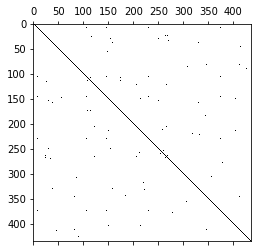

In [33]:
# compute the weight matrix W for the vertices of our graph 

def eta(tt, rr):

  val = tt <= rr 

  return val.astype(float)
  
import scipy.spatial 

dist = scipy.spatial.distance_matrix(X, X, p = 2)

r = 0.2

W = eta(dist, r)

plt.spy(W>=0.01)

In [34]:
# compute Laplacian matrices 

d = np.sum(W, axis=1) # degree vector

D = np.diag(d)
Ds = np.diag(1/np.sqrt(d))
Di = np.diag(1/d)


L = D - W # unnormalized

Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized

In [37]:
# compute eigendecompositions 

ll, VV = np.linalg.eigh(L)

# we need to sort the eigenvalues and vectors 

idx = ll.argsort()
l = ll[idx]
V = VV[:, idx]

lln, VVn = np.linalg.eigh(Ln)

idxn = lln.argsort()
ln = lln[idxn]
Vn = VVn[:, idxn]

q1 = np.sign(V[:,1])
print(q1)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  1.  1.  1. -1.  1.  1. -1.
 -1.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0